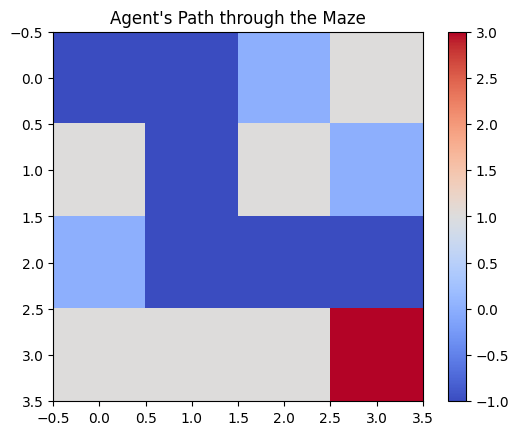

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Maze:
    def __init__(self, grid):
        self.grid = grid
        self.start = (0, 0)
        self.goal = (len(grid) - 1, len(grid[0]) - 1)
        self.state = self.start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        # Define possible actions: 0=up, 1=down, 2=left, 3=right
        x, y = self.state
        if action == 0:    # Up
            next_state = (max(x - 1, 0), y)
        elif action == 1:  # Down
            next_state = (min(x + 1, len(self.grid) - 1), y)
        elif action == 2:  # Left
            next_state = (x, max(y - 1, 0))
        elif action == 3:  # Right
            next_state = (x, min(y + 1, len(self.grid[0]) - 1))
        
        # Check for walls and update state
        if self.grid[next_state[0]][next_state[1]] == 1:  # Wall
            reward = -1
            next_state = self.state  # Stay in the same state
        elif next_state == self.goal:
            reward = 10
        else:
            reward = -0.05
        
        self.state = next_state
        return next_state, reward

class QLearningAgent:
    def __init__(self, maze):
        self.maze = maze
        self.q_table = np.zeros((len(maze.grid), len(maze.grid[0]), 4))  # State-action values
        self.alpha = 0.1   # Learning rate
        self.gamma = 0.9   # Discount factor
        self.epsilon = 0.2 # Exploration rate

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, 3)  # Explore: choose random action
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # Exploit: choose best action

    def learn(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1]])
        
        # Update Q-value using the Bellman equation
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], best_next_action]
        td_delta = td_target - self.q_table[state[0], state[1], action]
        
        # Update Q-value for current state-action pair
        self.q_table[state[0], state[1], action] += self.alpha * td_delta

def train_agent(maze, agent, episodes):
    for episode in range(episodes):
        state = maze.reset()
        
        while state != maze.goal:
            action = agent.choose_action(state)
            next_state, reward = maze.step(action)
            agent.learn(state, action, reward, next_state)
            state = next_state

# Define the maze environment (0=free space, 1=wall)
maze_grid = [
    [0, 0, 0, 1],
    [1, 0, 1, 0],
    [0, 0, 0, 0],
    [1, 1, 1, 0]
]

# Initialize maze and agent
maze = Maze(maze_grid)
agent = QLearningAgent(maze)

# Train the agent for a number of episodes
train_agent(maze, agent, episodes=1000)

# Test the trained agent by visualizing its path through the maze
def visualize_agent_path(maze, agent):
    path_grid = np.copy(maze.grid)
    state = maze.reset()
    
    # Mark the start position
    path_grid[state] = 2
    
    while state != maze.goal:
        path_grid[state] = -1   # Mark the path taken by the agent
        action = np.argmax(agent.q_table[state[0], state[1]])   # Choose best action based on learned policy
        state, _ = maze.step(action)
    
    # Mark the goal position
    path_grid[maze.goal] = 3
    
    # Visualize the path
    plt.imshow(path_grid, cmap="coolwarm", interpolation="nearest")
    plt.title("Agent's Path through the Maze")
    plt.colorbar()
    plt.show()

visualize_agent_path(maze, agent)
